In [22]:
# Script name: Assignment 8
# Purpose of script: Simulate data with correlated X's in MLRM, draw 1,000 random samples, and generate sample estimates, show sampling distribution of the estimated parameter, and show bias in the estimates.*
# Author: Minh-Thy Tyler
# Date Created: 
# 10/22/2022
# Notes: N/A
# ---------------------------

# Packages
import wooldridge as woo
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from statistics import mean
style.use('seaborn-darkgrid')
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import os
# Set up working directory
directory_path = '/Users/minh-thytyler/Desktop/2022-2023/ECON 320/HW' # use / instead of \ or use \ but insert r before (for instance: r'C:\your-directory-path')
os.chdir(directory_path)

In [1]:
# Set up the Data Generating Process


# Set NumPy Seed using birthday
birthday = '08182001'
rng = np.random.RandomState(int(birthday))

#Declare your betas
beta0= 9
beta1= 8
beta2= 2

#Declare alphas
alpha0 = 2
alpha1 = .8

# Calculate y, x and u over 1,000,000 values
x1 = rng.normal(loc = 10, scale=8**.5, size = 1000000)
u = rng.normal(loc = 0, scale= 1**.5, size = 1000000)
ui = rng.normal(loc = 0, scale = 1**.5, size = 1000000)
x2 = alpha0 + alpha1 * x1 + ui
y = beta0 + beta1 * x1 + beta2*x2+ u

# Store in Pandas DataFrame
population_data = pd.DataFrame({'y' : y, 'x1' : x1, 'x2':x2, 'u':u })
population_data.head()

NameError: name 'np' is not defined

**Part a**

In [12]:
#using covariance command to find covariance between x1 and x2
covX1X2 = np.cov(x1,x2)[1,0]
print(covX1X2)

6.416340133820085


**Part b**

In [13]:
# Get a sample of 1000 observations
sample_dfb = population_data.sample(n= 1000, random_state=int(2052001))

#Formula for total sum of squares
TSSx1 = ((sample_dfb['x1'] - sample_dfb['x1'].mean())**2).sum()
print(TSSx1)

8312.293606537514


**Part c**

In [14]:
# Get another sample of 1000 observations
sample_df = population_data.sample(n= 1000, random_state=int(2052001))

#estimating from underspecified sample regression function
undermod = smf.ols(formula='y ~ x1', data=sample_dfb)
underres = undermod.fit()

underres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.596e+05
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:48:10   Log-Likelihood:                -2200.1
No. Observations:                1000   AIC:                             4404.
Df Residuals:                     998   BIC:                             4414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1002      0.247     52.946      0.000      12.615      13.586
x1             9.5784      0.024    399.441      0.000       9.531       9.625
==============================================================================
Omnibus:                        1.230   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.541   Jarque-Bera (JB):                1.308
Skew:                          -0.069   Prob(JB):                        0.520
Kurtosis:                       2.888   Cond. No.                         37.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Estimating the parameters for beta0 and beta1
underres.params

Intercept    13.100185
x1            9.578370
dtype: float64

**Part d**

$\tilde{\beta_1}$ means that $\tilde{\beta_1}$ comes from an underspecified model (Hence, the '~' instead of '^'). $\tilde{\beta_1}$ is 9.57. $\tilde{\beta_1}$ is much higher (higher by +1.57) than the actual beta1 parameter which is 8. This is because we omitted a variable (beta2) that belongs to the population model, and we are estimating beta1 from an underspecified sample regression function. We ran the the regression of y only on x1 and not x2, so we did not get an unbiased estimator of beta1. 

**Part e**

In [16]:
#Estimating parameters of a properly specified sample regression function
mod = smf.ols(formula='y ~ x1+x2', data=sample_dfb)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.572e+05
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:48:15   Log-Likelihood:                -1452.5
No. Observations:                1000   AIC:                             2911.
Df Residuals:                     997   BIC:                             2926.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2631      0.134     69.029      0.000       9.000       9.526
x1             8.0129      0.029    276.572      0.000       7.956       8.070
x2             1.9549      0.033     58.735      0.000       1.890       2.020
==============================================================================
Omnibus:                        0.905   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.780
Skew:                          -0.011   Prob(JB):                        0.677
Kurtosis:                       3.135   Cond. No.                         60.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#Estimating the parameters for beta0, beta1, and beta2
res.params

Intercept    9.263095
x1           8.012937
x2           1.954921
dtype: float64

$\hat{\beta_1}$ gives a much more accurate estimate than $\tilde{\beta_1}$. $\hat{\beta_1}$ is 8.01, which is closer to  $\beta_1$ which is 8 (compared to $\tilde{\beta_1}$, which is 9.57). This is because we are estimating beta1 from a properly specified sample regression function, which we want to do to get a beta1 estimator that is unbiased.


**Part f** 

In [19]:
#Repeating step c and step b 1000 times
beta1tts_ar = []
beta1_ar = []
for i in range(1000):
    sample_dff = population_data.sample(n = 1000, random_state=i)
    TSSx1s = ((sample_dff['x1'] - sample_dff['x1'].mean())**2).sum()
    regf = smf.ols(formula = 'y ~ x1', data = sample_dff).fit()
    beta1tts_ar.append(TSSx1s)
    beta1_ar.append(regf.params[1])

reg_coeff_df = pd.DataFrame({'beta1': beta1_ar})
reg_coeff_df.head()

,beta1
0,9.608807
1,9.616512
2,9.601074
3,9.613835
4,9.590304


**Part g**

Text(0.5, 1.0, 'Fig 1: Sampling Distribution of Beta 1~')

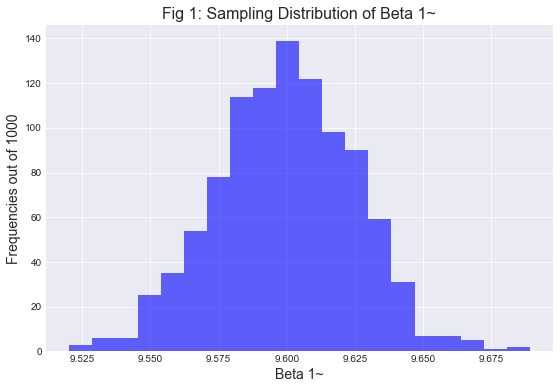

In [20]:
plt.figure(figsize= (20,6))

#Distribution of Beta1
plt.subplot(1,2,1)
plt.hist(reg_coeff_df['beta1'], alpha = .6, color = 'Blue', bins = 20)
plt.xlabel("Beta 1~", fontsize = 14)
plt.ylabel("Frequencies out of 1000", fontsize = 14)
plt.title("Fig 1: Sampling Distribution of Beta 1~", fontsize = 16)


**What is the mean of the distribution of $\tilde{\beta_1}$ and what is its difference from $\beta_1$?**

In [25]:
print('Mean:', np.mean(beta1_ar))

Mean: 9.599493311702947


In [27]:
print('Difference:', np.mean(beta1_ar)-8)

Difference: 1.5994933117029468


**Part h**

I would expect to see a greater covariance and total sum of squares of x1 for $\tilde{\beta_1}$ than $\hat{\beta_1}$. This is because $\tilde{\beta_1}$ is from an underspecified sample regression function, making it a biased estimator. I would also expect that $\tilde{\beta_1}$ would have a closer mean to the actual B1.